### Implementation of Principle Component Analysis to Diabetes Data

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.datasets import load_diabetes

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = load_diabetes()

In [3]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['Target'] = diabetes.target  # Hedef değişkeni DataFrame'e ekle
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


**Features Explanation**
- age in years

- sex

- bmi: body mass index

- bp: average blood pressure

- s1: total serum cholesterol

- s2: low-density lipoproteins

- s3: high-density lipoproteins

- s4: total cholesterol / HDL

- s5: possibly log of serum triglycerides level

- s6: blood sugar level

<Axes: title={'center': 'Correlation between features'}>

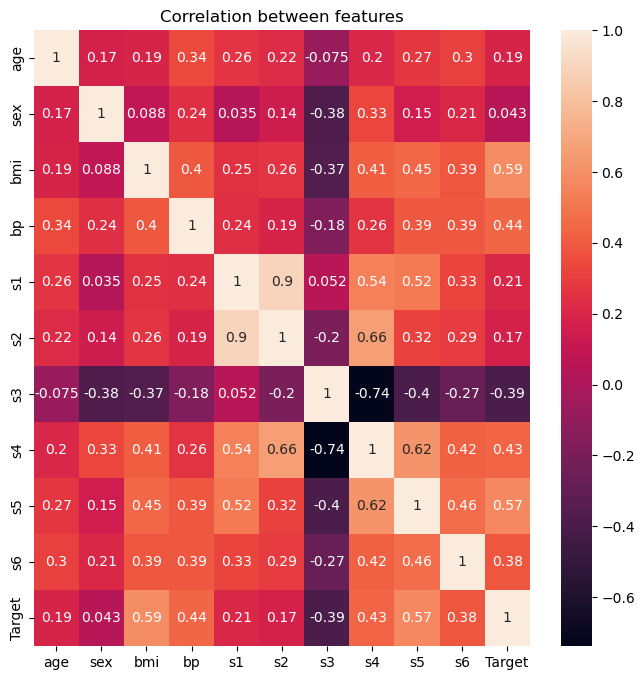

In [4]:
plt.figure(figsize=(8,8))
plt.title('Correlation between features')
sns.heatmap(diabetes_df.corr(), annot=True)

**Apply PCA**

- We first apply PCA to select 2 features exactly. After that we are going to apply PCA to specicify the variance value that we want after the process.

In [5]:
X_diabetes = diabetes_df.drop('Target', axis=1)
y_diabetes = diabetes.target

In [6]:
# apply PCA.
pca = PCA(n_components=2)
X_pca_diabetes = pca.fit_transform(X_diabetes)

pca_df = pd.DataFrame(data=X_pca_diabetes, columns=['PCA1', 'PCA2'])
# merge target value.
pca_df['Target'] = diabetes_df['Target']
pca_df.head()

,PCA1,PCA2,Target
0,0.027930,-0.092601,151.0
1,-0.134687,0.065263,75.0
2,0.012944,-0.077764,141.0
3,0.002344,0.018183,206.0
4,-0.035979,0.038621,135.0


**Specify variance. Lets say %89 variance is enough for this dataset.**

In [7]:
pca = PCA(.89)

X_pca_diabetes = pca.fit_transform(X_diabetes)

In [8]:
X_pca_diabetes.shape

(442, 6)

**We see that PCA decompose features into 6 from 10.**

### Training

In [9]:
X = diabetes_df.drop('Target', axis=1)
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=9)

model = LinearRegression()

results = pd.DataFrame(columns=['Variance', 'Number of Components', 'RMSE'])

for variance in np.arange(0.99, 0.85, -0.01):
    pca = PCA(n_components=variance)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    new_row = pd.DataFrame({
        'Variance': [variance],
        'Number of Components': [pca.n_components_],
        'RMSE': [rmse]
    })
    results = pd.concat([results, new_row], ignore_index=True)

results

,Variance,Number of Components,RMSE
0,0.99,8,46.540416
1,0.98,8,46.540416
2,0.97,8,46.540416
3,0.96,8,46.540416
4,0.95,7,46.604186
5,0.94,7,46.604186
6,0.93,7,46.604186
7,0.92,7,46.604186
8,0.91,7,46.604186
9,0.90,7,46.604186
